In [63]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ruptures as rpt

In [64]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # To show all rows
pd.set_option('display.max_columns', None)  # To show all columns
pd.set_option('display.width', None)  # To adjust the display width

In [65]:
def getValues1(tagList):
    url = "https://exactspace.co/kairosapi/api/v1/datapoints/query"
    d = {
        "metrics": [
            {
                "tags": {},
                "name": "",
                "aggregators": [
                    {
                        "name": "avg",
                        "sampling": {
                            "value": "1",
                            "unit": "minutes"
                        }
                    }
                ]
            }
        ],
        "plugins": [],
        "cache_time": 0,
        "cache_time": 0,
        "start_relative": {
        "value": "1",
        "unit": "days"
      }
    }
    finalDF = pd.DataFrame()
    for tag in tagList:
        d['metrics'][0]['name'] = tag
        res = requests.post(url=url, json=d)
        values = json.loads(res.content)
        df = pd.DataFrame(values["queries"][0]["results"][0]['values'], columns=['time', values["queries"][0]["results"][0]['name']])
        finalDF = pd.concat([finalDF, df], axis=1)

    finalDF = finalDF.loc[:, ~finalDF.columns.duplicated()]
    finalDF.dropna(subset=['time'], inplace=True)
    finalDF['time'] = pd.to_datetime(finalDF['time'], unit='ms').dt.strftime('%d-%m-%y %H:%M')

    return finalDF

In [66]:
tags= [
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric',
    'GAP_GAP03.PLC03.SCHENCK2_FEED_RATE',
    'GAP_9dfb_BallMill_Total_Power',       # Ball mill Tags
    'GAP_GAP01.PLC01._362_E200_JIT_01.PV',
    'GAP_GAP01.PLC01._362_E310_FIT_01.PV',
    'GAP_GAP01.PLC01._362_E200_ST_01.PV', # Mixer Tags
    'GAP_GAP04.PLC04.Power_M1',
    'GAP_GAP04.PLC04.Power_M2',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Height',
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Height',
    'GAP_GAP01.PLC01._362_E290_LIT_01.PV', #Fines silo level
    'GAP_GAP01.PLC01._362_E090_LIT_01.PV', #Grains silo level
    'GAP_GAP04.PLC04.K363_K180_PIT_01_PV', #Hydraulic pressure
    'GAP_GAP04.PLC04.K050_PIT_01_PV', #Mould 2 clamping pressure
    'GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power', #mixer power
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight', # anode m1 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight', # anode m2 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density',
    'GAP_GAP01.PLC01._362_E020_VT_01.PV',
    'GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF',
    'GAP_GAP01.PLC01._362_E015_LIT_01.PV' #rhodax tags
]

In [67]:
raw_data=getValues1(tags)

In [68]:
raw_data.head()

,time,GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric,GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric,GAP_GAP03.PLC03.SCHENCK2_FEED_RATE,GAP_9dfb_BallMill_Total_Power,GAP_GAP01.PLC01._362_E200_JIT_01.PV,GAP_GAP01.PLC01._362_E310_FIT_01.PV,GAP_GAP01.PLC01._362_E200_ST_01.PV,GAP_GAP04.PLC04.Power_M1,GAP_GAP04.PLC04.Power_M2,GAP_GAP04.PLC04.MLD1_DATA_Anode_Height,GAP_GAP04.PLC04.MLD2_DATA_Anode_Height,GAP_GAP01.PLC01._362_E290_LIT_01.PV,GAP_GAP01.PLC01._362_E090_LIT_01.PV,GAP_GAP04.PLC04.K363_K180_PIT_01_PV,GAP_GAP04.PLC04.K050_PIT_01_PV,GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power,GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density,GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density,GAP_GAP01.PLC01._362_E020_VT_01.PV,GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF,GAP_GAP01.PLC01._362_E015_LIT_01.PV
0,19-10-23 10:20,1.656840,1.651335,5911.283570,20.921300,20.921320,0.0,97.502508,35.452270,33.700950,681.094088,684.76404,51.616450,58.064130,210.691080,138.138750,116.34892,1068.21228,1075.578000,1.436480,1.43170,7.037920,52.0,70.704517
1,19-10-23 10:21,1.655430,1.651320,5971.473875,20.503225,20.503222,0.0,97.512812,35.807268,33.700950,682.532290,681.87189,52.490933,58.848320,217.133307,133.686850,116.34892,1068.21228,1067.799800,1.434850,1.43170,8.971062,52.0,82.450720
2,19-10-23 10:22,1.654960,1.651320,5900.385865,20.388375,20.388393,0.0,97.464230,35.925600,33.902115,682.532290,680.90784,53.400250,60.426500,217.131210,291.310800,116.34892,1068.21228,1067.799800,1.434850,1.43170,6.188140,52.0,69.051990
3,19-10-23 10:23,1.654960,1.651530,5915.578245,20.892450,20.892465,0.0,97.331245,35.925600,34.505610,680.725375,680.90784,54.364530,62.212260,196.747327,79.614465,115.25986,1062.34906,1067.799800,1.434850,1.43206,8.844618,52.0,89.007463
4,19-10-23 10:24,1.654805,1.652160,5916.345825,20.484950,20.484967,0.0,97.370992,35.925600,34.505610,675.304630,679.78670,55.066275,63.703583,217.173410,183.185653,114.17080,1056.48584,1063.792785,1.434585,1.43242,6.455260,52.0,65.362935


In [69]:
data = raw_data.copy()

In [70]:
data.shape

(1247, 24)

In [71]:
data=data[(data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']>=5500) & (data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']<6400)]

In [72]:
data.shape

(376, 24)

In [73]:
data.head()

,time,GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric,GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric,GAP_GAP03.PLC03.SCHENCK2_FEED_RATE,GAP_9dfb_BallMill_Total_Power,GAP_GAP01.PLC01._362_E200_JIT_01.PV,GAP_GAP01.PLC01._362_E310_FIT_01.PV,GAP_GAP01.PLC01._362_E200_ST_01.PV,GAP_GAP04.PLC04.Power_M1,GAP_GAP04.PLC04.Power_M2,GAP_GAP04.PLC04.MLD1_DATA_Anode_Height,GAP_GAP04.PLC04.MLD2_DATA_Anode_Height,GAP_GAP01.PLC01._362_E290_LIT_01.PV,GAP_GAP01.PLC01._362_E090_LIT_01.PV,GAP_GAP04.PLC04.K363_K180_PIT_01_PV,GAP_GAP04.PLC04.K050_PIT_01_PV,GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power,GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density,GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density,GAP_GAP01.PLC01._362_E020_VT_01.PV,GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF,GAP_GAP01.PLC01._362_E015_LIT_01.PV
0,19-10-23 10:20,1.656840,1.651335,5911.283570,20.921300,20.921320,0.0,97.502508,35.452270,33.700950,681.094088,684.76404,51.616450,58.064130,210.691080,138.138750,116.34892,1068.21228,1075.578000,1.436480,1.43170,7.037920,52.0,70.704517
1,19-10-23 10:21,1.655430,1.651320,5971.473875,20.503225,20.503222,0.0,97.512812,35.807268,33.700950,682.532290,681.87189,52.490933,58.848320,217.133307,133.686850,116.34892,1068.21228,1067.799800,1.434850,1.43170,8.971062,52.0,82.450720
2,19-10-23 10:22,1.654960,1.651320,5900.385865,20.388375,20.388393,0.0,97.464230,35.925600,33.902115,682.532290,680.90784,53.400250,60.426500,217.131210,291.310800,116.34892,1068.21228,1067.799800,1.434850,1.43170,6.188140,52.0,69.051990
3,19-10-23 10:23,1.654960,1.651530,5915.578245,20.892450,20.892465,0.0,97.331245,35.925600,34.505610,680.725375,680.90784,54.364530,62.212260,196.747327,79.614465,115.25986,1062.34906,1067.799800,1.434850,1.43206,8.844618,52.0,89.007463
4,19-10-23 10:24,1.654805,1.652160,5916.345825,20.484950,20.484967,0.0,97.370992,35.925600,34.505610,675.304630,679.78670,55.066275,63.703583,217.173410,183.185653,114.17080,1056.48584,1063.792785,1.434585,1.43242,6.455260,52.0,65.362935


In [74]:
data = data[(data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] >= 1.56) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] >= 1.56)]


In [75]:
data.shape

(376, 24)

In [76]:
df_filtered=data.copy()

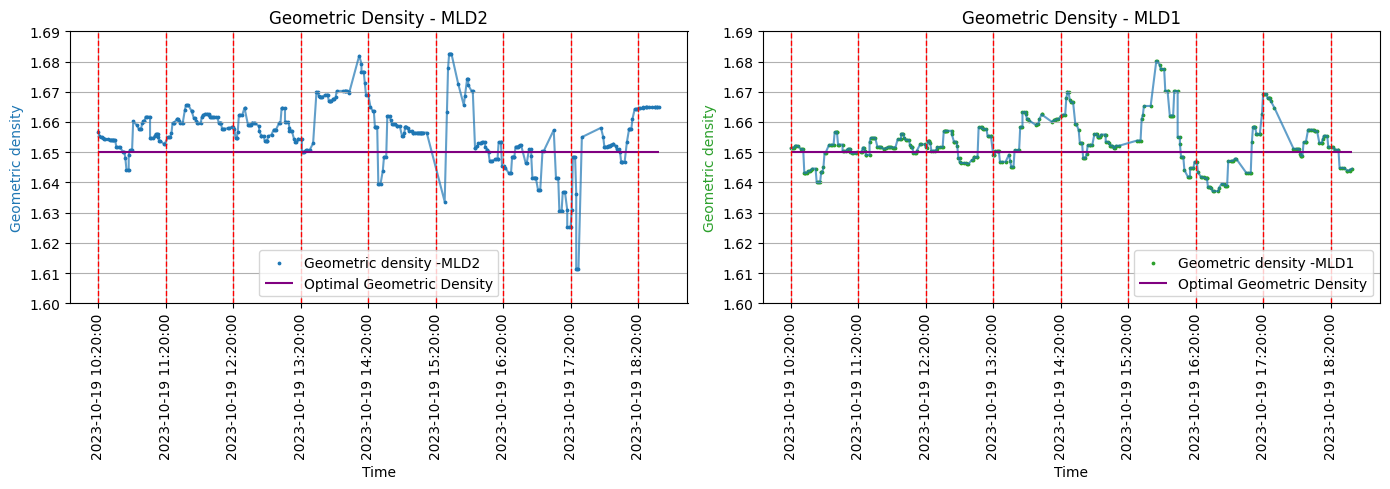

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x2 subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot on the first subplot
ax1.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], label='Geometric density -MLD2', color='tab:blue', s=3)
ax1.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax1.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax1.set_xlabel('Time')
ax1.set_ylabel('Geometric density', color='tab:blue')
ax1.set_title('Geometric Density - MLD2')

# Plot on the second subplot
ax2.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], label='Geometric density -MLD1', color='tab:green', s=3)
ax2.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax2.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Geometric density', color='tab:green')
ax2.set_title('Geometric Density - MLD1')

# Customize x-axis ticks as hourly intervals for both subplots
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax1.set_xticks(hourly_intervals)
ax1.set_xticklabels(hourly_intervals, rotation=90)
ax2.set_xticks(hourly_intervals)
ax2.set_xticklabels(hourly_intervals, rotation=90)

ax1.set_ylim(1.60, 1.69)
ax2.set_ylim(1.60, 1.69)

# Add a grid to both subplots
ax1.grid(True)
ax2.grid(True)

ax1.legend()
ax2.legend()

# Add vertical lines for each hour to both subplots
for interval in hourly_intervals:
    ax1.axvline(interval, color='red', linestyle='--', linewidth=1)
    ax2.axvline(interval, color='red', linestyle='--', linewidth=1)

plt.tight_layout()  # To ensure subplots don't overlap
plt.show()


In [78]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    std_dev = data_subset.std()
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-19 10:20:00 to 2023-10-19 11:20:00: 0.0047
Standard Deviation of Geometric density from mould-1:2023-10-19 11:20:00 to 2023-10-19 12:20:00: 0.0020
Standard Deviation of Geometric density from mould-1:2023-10-19 12:20:00 to 2023-10-19 13:20:00: 0.0040
Standard Deviation of Geometric density from mould-1:2023-10-19 13:20:00 to 2023-10-19 14:20:00: 0.0064
Standard Deviation of Geometric density from mould-1:2023-10-19 14:20:00 to 2023-10-19 15:20:00: 0.0063
Standard Deviation of Geometric density from mould-1:2023-10-19 15:20:00 to 2023-10-19 16:20:00: 0.0125
Standard Deviation of Geometric density from mould-1:2023-10-19 16:20:00 to 2023-10-19 17:20:00: 0.0073
Standard Deviation of Geometric density from mould-1:2023-10-19 17:20:00 to 2023-10-19 18:20:00: 0.0069


In [79]:
# Geometric density from mould-2


In [83]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    specific_number = 1.65
    data = data_subset.values
    z_scores = (data - specific_number)/np.std(data)
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))
    for k, value in enumerate(data):
        print(f'Data Point {k+1}: {value:.4f} is {z_scores[i]:.3f} standard deviations from {specific_number}.')
    threshold = 0.006
    within_range = z_scores <= threshold
    print("Data points within 1 standard deviations from the specific number:")
    print(data[within_range])
    print("\n")

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-19 10:20:00 to 2023-10-19 11:20:00:
Data Point 1: 1.6513 is 0.289 standard deviations from 1.65.
Data Point 2: 1.6513 is 0.289 standard deviations from 1.65.
Data Point 3: 1.6513 is 0.289 standard deviations from 1.65.
Data Point 4: 1.6515 is 0.289 standard deviations from 1.65.
Data Point 5: 1.6522 is 0.289 standard deviations from 1.65.
Data Point 6: 1.6522 is 0.289 standard deviations from 1.65.
Data Point 7: 1.6522 is 0.289 standard deviations from 1.65.
Data Point 8: 1.6510 is 0.289 standard deviations from 1.65.
Data Point 9: 1.6510 is 0.289 standard deviations from 1.65.
Data Point 10: 1.6510 is 0.289 standard deviations from 1.65.
Data Point 11: 1.6431 is 0.289 standard deviations from 1.65.
Data Point 12: 1.6431 is 0.289 standard deviations from 1.65.
Data Point 13: 1.6431 is 0.289 standard deviations from 1.65.
Data Point 14: 1.6431 is 0.289 standard deviations from 1.65.
Data Point 15: 1.6437 is 0.289 standard devi

In [81]:
data_subset.values

array([1.66933   , 1.66933   , 1.66933   , 1.66933   , 1.66781   ,
       1.66781   , 1.66781   , 1.66781   , 1.66678333, 1.66473   ,
       1.65119   , 1.6511075 , 1.65108   , 1.65108   , 1.65108   ,
       1.64955333, 1.64879   , 1.64879   , 1.64879   , 1.65333   ,
       1.65333   , 1.65333   , 1.65745   , 1.65745   , 1.65745   ,
       1.65745   , 1.65719   , 1.65693   , 1.65693   , 1.65693   ,
       1.65308   , 1.65308   , 1.65308   , 1.65425   , 1.65542   ,
       1.65542   , 1.65542   , 1.65162   , 1.65162   ])